In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_absolute_percentage_error as MAPE

## 解題步驟：

1. 讀取 x_train.npy, y_train.npy, x_test.npy, y_test.npy
2. 將 training dataset 再切分為 training set, validation set (圖一)
3. 先以上課的知識調整出一個不會 over-fitting 太多的決策樹模型
4. 以 validation set 作為調整參數的基準，陸續調整其他參數 (請同學測試看看 validation 要佔多少比例，後續的調整會比較客觀)
5. 將最終調整結果與一開始的決策樹做比較，誤差是否有降低
6. 同學若也懂其他模型的知識也可以試試看一樣的做法比較看看

#### 圖一 (Train, Validation and Test)
<img src="./train_val_test.png" style="zoom:30%;" />

#### 圖二 (是我前後調整的結果)
<img src="./report.png" style="zoom:30%;" />

In [10]:
# Read data
""" Your code here """
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

x_train,x_val,y_train,y_val = train_test_split(x_train , y_train , test_size = 0.4)

print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(657, 89) (657,)
(438, 89) (438,)
(365, 89) (365,)


In [14]:
def regression_report(y_true , pred , verbose = True):
    mse = MSE(y_true,pred)
    mae = MAE(y_true,pred)
    rmse = np.sqrt(mse)
    mape = MAPE(y_true,pred)
    if verbose:
        print(f'MSE :{mse:.4f}')
        print(f'MAE :{mae:.4f}')
        print(f'RMSE :{rmse:.4f}')
        print(f'MAPE :{mape:.4f}')
 # return mse, mae, rmse, mape

## 請同學先依照上課的知識，調整一個沒有 overfitting 的決策樹，請以 mape 作為參考誤差指標，較容易看出關係

In [55]:
""" Your code here """
DT = DecisionTreeRegressor(criterion = 'mae',max_depth=25 ,min_samples_split = 3,
                           min_samples_leaf = 4 , max_features = 'sqrt',ccp_alpha = 200)
DT.fit(x_train,y_train)

print("Train Report")
pred = DT.predict(x_train)
regression_report(y_train , pred)

print("\nValidation Report")
pred_v = DT.predict(x_val)
regression_report(y_val,pred_v)

print("\nTest Report")
pred_T = DT.predict(x_test)
regression_report(y_test,pred_T)

Train Report
MSE :1341972283.3470
MAE :24101.3349
RMSE :36632.9399
MAPE :0.1506

Validation Report
MSE :2651024400.5639
MAE :34342.6279
RMSE :51488.0996
MAPE :0.1951

Test Report
MSE :2770609649.9808
MAE :32922.7863
RMSE :52636.5809
MAPE :0.1877


## 調整 決策樹參數
### 請同學從 criterion 的設定中，判斷這組資料集裡的 outlier 多嗎？

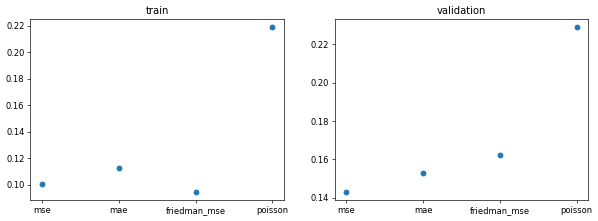

In [72]:
params = ['mse', 'mae', 'friedman_mse', 'poisson']
train_loss = np.zeros(len(params))
val_loss = np.zeros(len(params))


#i代表0,1,2,3 param代表 mse,mae.....
for i , param in enumerate(params):
    DT = DecisionTreeRegressor(criterion = param,max_depth=25 ,min_samples_split = 3,
                               min_samples_leaf = 4 , max_features = 'sqrt',ccp_alpha = 200)
    DT.fit(x_train,y_train)
    pred = DT.predict(x_train)
    #預測完之後用我們得到的y_hat跟真實的y做比較用MAPE來呈現出誤差的比例
    train_loss[i] = MAPE(pred,y_train)
    
    pred = DT.predict(x_val)
    #預測完之後用我們得到的y_hat跟真實的y做比較用MAPE來呈現出誤差的比例
    val_loss[i] = MAPE(pred,y_val)

plt.figure(figsize = (12,4),dpi = 60)
plt.subplot(1,2,1)
plt.title('train')
plt.scatter(params,train_loss)

plt.subplot(1,2,2)
plt.title('validation')
plt.scatter(params,val_loss)

#根據圖表我們選擇friedman_mse當作我們的criterion，接著調整dept

## 調整 max_depth


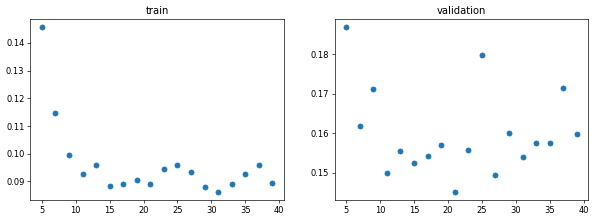

In [99]:
params = np.arange(5, 40, 2)
train_loss = np.zeros(len(params))
val_loss = np.zeros(len(params))

for i ,param in enumerate(params):
    DT = DecisionTreeRegressor(criterion = 'friedman_mse',max_depth=param ,min_samples_split = 3,
                               min_samples_leaf = 4 , max_features = 'sqrt',ccp_alpha = 200)
    DT.fit(x_train,y_train)
    pred = DT.predict(x_train)
    #預測完之後用我們得到的y_hat跟真實的y做比較用MAPE來呈現出誤差的比例
    train_loss[i] = MAPE(pred,y_train)
    
    pred = DT.predict(x_val)
    #預測完之後用我們得到的y_hat跟真實的y做比較用MAPE來呈現出誤差的比例
    val_loss[i] = MAPE(pred,y_val)

plt.figure(figsize = (12,4),dpi = 60)
plt.subplot(1,2,1)
plt.title('train')
plt.scatter(params,train_loss)

plt.subplot(1,2,2)
plt.title('validation')
plt.scatter(params,val_loss)

#根據圖表都還算接近深度就讓它25

## Tuning min_samples_split

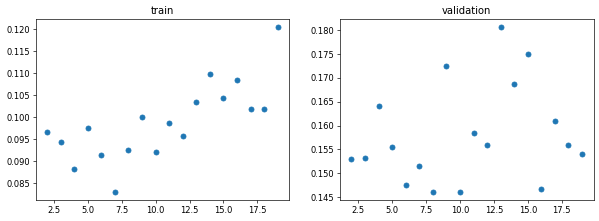

In [105]:
params = np.arange(2, 20, 1)
train_loss = np.zeros(len(params))
val_loss = np.zeros(len(params))

for i ,param in enumerate(params):
    DT = DecisionTreeRegressor(criterion = 'friedman_mse',max_depth=25 ,min_samples_split = param,
                               min_samples_leaf = 4 , max_features = 'sqrt',ccp_alpha = 200)
    DT.fit(x_train,y_train)
    pred = DT.predict(x_train)
    #預測完之後用我們得到的y_hat跟真實的y做比較用MAPE來呈現出誤差的比例
    train_loss[i] = MAPE(pred,y_train)
    
    pred = DT.predict(x_val)
    #預測完之後用我們得到的y_hat跟真實的y做比較用MAPE來呈現出誤差的比例
    val_loss[i] = MAPE(pred,y_val)

plt.figure(figsize = (12,4),dpi = 60)
plt.subplot(1,2,1)
plt.title('train')
plt.scatter(params,train_loss)

plt.subplot(1,2,2)
plt.title('validation')
plt.scatter(params,val_loss)

#照圖調成7好像會更好

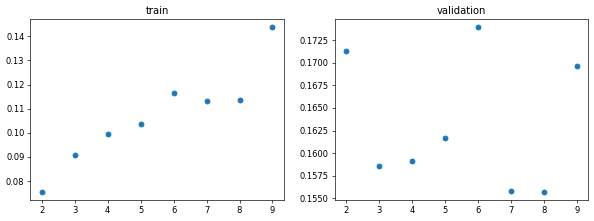

In [112]:
params = np.arange(2, 10, 1)
train_loss = np.zeros(len(params))
val_loss = np.zeros(len(params))

for i ,param in enumerate(params):
    DT = DecisionTreeRegressor(criterion = 'friedman_mse',max_depth=25 ,min_samples_split = 7,
                               min_samples_leaf = param , max_features = 'sqrt',ccp_alpha = 200)
    DT.fit(x_train,y_train)
    pred = DT.predict(x_train)
    #預測完之後用我們得到的y_hat跟真實的y做比較用MAPE來呈現出誤差的比例
    train_loss[i] = MAPE(pred,y_train)
    
    pred = DT.predict(x_val)
    #預測完之後用我們得到的y_hat跟真實的y做比較用MAPE來呈現出誤差的比例
    val_loss[i] = MAPE(pred,y_val)

plt.figure(figsize = (12,4),dpi = 60)
plt.subplot(1,2,1)
plt.title('train')
plt.scatter(params,train_loss)

plt.subplot(1,2,2)
plt.title('validation')
plt.scatter(params,val_loss)

#min_samples_leaf調成3

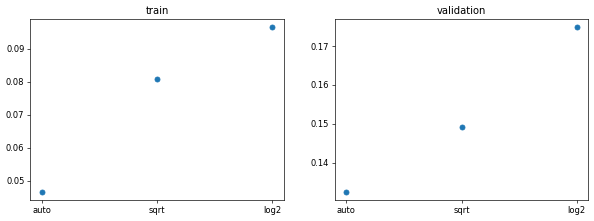

In [113]:
params = ['auto','sqrt','log2']
train_loss = np.zeros(len(params))
val_loss = np.zeros(len(params))

for i ,param in enumerate(params):
    DT = DecisionTreeRegressor(criterion = 'friedman_mse',max_depth=25 ,min_samples_split = 7,
                               min_samples_leaf = 3 , max_features = param ,ccp_alpha = 200)
    DT.fit(x_train,y_train)
    pred = DT.predict(x_train)
    #預測完之後用我們得到的y_hat跟真實的y做比較用MAPE來呈現出誤差的比例
    train_loss[i] = MAPE(pred,y_train)
    
    pred = DT.predict(x_val)
    #預測完之後用我們得到的y_hat跟真實的y做比較用MAPE來呈現出誤差的比例
    val_loss[i] = MAPE(pred,y_val)

plt.figure(figsize = (12,4),dpi = 60)
plt.subplot(1,2,1)
plt.title('train')
plt.scatter(params,train_loss)

plt.subplot(1,2,2)
plt.title('validation')
plt.scatter(params,val_loss)

#調成auto比較優

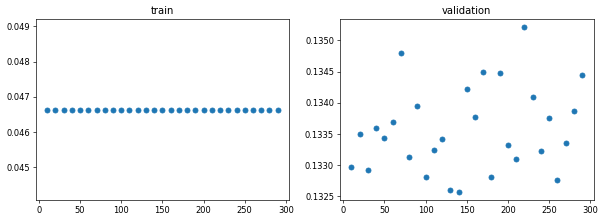

In [119]:
params = np.arange(10,300,10)
train_loss = np.zeros(len(params))
val_loss = np.zeros(len(params))

for i ,param in enumerate(params):
    DT = DecisionTreeRegressor(criterion = 'friedman_mse',max_depth=25 ,min_samples_split = 7,
                               min_samples_leaf = 3 , max_features = 'auto' ,ccp_alpha = 200)
    DT.fit(x_train,y_train)
    pred = DT.predict(x_train)
    #預測完之後用我們得到的y_hat跟真實的y做比較用MAPE來呈現出誤差的比例
    train_loss[i] = MAPE(pred,y_train)
    
    pred = DT.predict(x_val)
    #預測完之後用我們得到的y_hat跟真實的y做比較用MAPE來呈現出誤差的比例
    val_loss[i] = MAPE(pred,y_val)

plt.figure(figsize = (12,4),dpi = 60)
plt.subplot(1,2,1)
plt.title('train')
plt.scatter(params,train_loss)

plt.subplot(1,2,2)
plt.title('validation')
plt.scatter(params,val_loss)

#這個先不動 仍維持200

## Final Report

In [122]:
DT = DecisionTreeRegressor(criterion = 'friedman_mse',max_depth=25 ,min_samples_split = 7,
                               min_samples_leaf = 3 , max_features = 'auto' ,ccp_alpha = 200)

DT.fit(x_train,y_train)

print("Train Report")
pred = DT.predict(x_train)
regression_report(y_train , pred)

print("\nValidation Report")
pred_v = DT.predict(x_val)
regression_report(y_val,pred_v)

print("\nTest Report")
pred_T = DT.predict(x_test)
regression_report(y_test,pred_T)

Train Report
MSE :213935053.7286
MAE :8356.0515
RMSE :14626.5189
MAPE :0.0479

Validation Report
MSE :1671546085.1177
MAE :25563.4692
RMSE :40884.5458
MAPE :0.1485

Test Report
MSE :2229044040.6500
MAE :28949.9280
RMSE :47212.7529
MAPE :0.1618
